# Distribution Over Functions
## General Form

$\mu = K^{\star} * K^{-1} * y$

$\mathbb{V} = K^{\star\star} - K^{\star} * K^{-1} * K^{\star^{T}}$

| Symbol | Description |
| - | - |
| $ \mu $ | mean parameter |
| $ y $ | y values |
| $ K^{\star} * K^{-1} $ | weight matrix |
| $ K^{-1} $ | interactions between x values (distance apart, relation, etc) |
| $ K^{\star} $ | how do new points relate to points we have |
| $ K^{\star\star} $ | covariance matrix which captures the relation between new points and themselves |
| $ K^{\star} * K^{-1} * K^{\star^{T}} $ | covariance matrix which captures the relation between the new points and the old points |
| $ K^{\star^{T}} $ | reduces the variance for points that are closer to points we already know the value of |

## Kernel-First View (from [here](http://gaussianprocess.org/gpml/chapters/RW.pdf))

$ f(x) $ is noiseless

$ f(x) \sim GP(m(x),k(x, x')), m(x) = 0 $

$ k(x, x') = e^{- \frac{1}{2} \parallel x - x' \parallel^{2}} = \begin{Bmatrix} 1, x = x' \\ 0, x - x' \rightarrow \pm \infty \end{Bmatrix}$

$ K(X, X) = \begin{pmatrix} k(x_{1}, x_{1}) & \cdots & k(x_{1}, x_{n}) \\ \vdots & \ddots & \vdots \\ k(x_{n}, x_{1}) & \cdots & k(x_{n}, x_{n}) \end{pmatrix} = \begin{pmatrix} 1 & \cdots & k(x_{1}, x_{n}) \\ \vdots & \ddots & \vdots \\ k(x_{n}, x_{1}) & \cdots & 1 \end{pmatrix}$

| Symbol | Description |
| - | - |
| $ m(x) $ | some mean |
| $ k(x, x') $ | some kernel function which says how much they relate to eachother |
| $ e^{- \frac{1}{2} \parallel x - x' \parallel^{2}} $ | for each two points, if the points are exactly the same, the kernal value is 1 and it will become 0 as it approaches infinity (close points have same values, far points hardly relate) |
| $ K(X, X) $ | kernel matrix |

At this point, you have everything you need for a GP "prior" (to seeing any data)

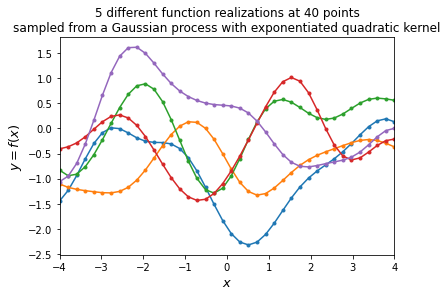

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import distance_matrix


def calculate_squared_exponential(x, xp, scale_factor=1, length_scale=1):
    """
    Method for calculating relation between two points.

    Arguments:
        x {float} -- point A
        xp {float} -- point B

    Returns:
        float -- relation between two points
    """
    return scale_factor**2 * np.exp(-1 / 2 * (distance_matrix(x, xp) / length_scale)**2)

def calculate_kernel_matrix(kernel, x_data):
    """
    Calculate kernel matrix.

    Arguments:
        kernel {function} -- kernel of your choice
        x_data {np.ndarray} -- nx1 matrix of 'x' data points

    Returns:
        np.ndarray -- covariance matrix
    """
    return np.array([[kernel(xA[0], xB[0]) for xB in x_data] for xA in x_data])

num_pnts = 40  # number of points in each function
num_sample = 50  # number of points being sampled
num_fn = 5  # number of functions to sample
bounds = [-4, 4]  # domain

x_data = np.expand_dims(np.linspace(bounds[0], bounds[1], num_pnts), 1)
x_test = np.linspace(bounds[0], bounds[1], num_sample).reshape(-1, 1)
y_data = np.sin(x_data)
K_ss = calculate_squared_exponential(x_data, x_data)
gp_prior = np.random.multivariate_normal(mean=np.zeros(num_pnts), cov=K_ss, size=num_fn)

plt.figure(figsize=(6, 4))
for i in range(num_fn):
    plt.plot(x_data, gp_prior[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    f'5 different function realizations at {num_pnts} points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim(bounds)
plt.show()